## MMSB: Politics

In [20]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import utils
import mmsb

%matplotlib inline
matplotlib.style.use('ggplot')

from IPython.core.debugger import Tracer
tracer = Tracer()

import warnings
warnings.filterwarnings('error')

In [3]:
data = pd.read_csv('../data/all_our_ideas/727/727_dat.csv', header=None)
names = pd.read_csv('../data/all_our_ideas/727/727_text_map.csv', header=None)[1]
data.head()

,0,1,2,3
0,4,19,0,a1edf431db337a38948276a3331cd3b3
1,4,15,1,a1edf431db337a38948276a3331cd3b3
2,6,21,1,a1edf431db337a38948276a3331cd3b3
3,0,14,1,a1edf431db337a38948276a3331cd3b3
4,4,8,0,a1edf431db337a38948276a3331cd3b3


In [4]:
X = data[[0,1,2]].values
X.shape

(76632, 3)

In [9]:
V = max(X[:,1]) + 1
V

269

0:12:32.166949


(-46834.091807219986, -46834.091807219986)

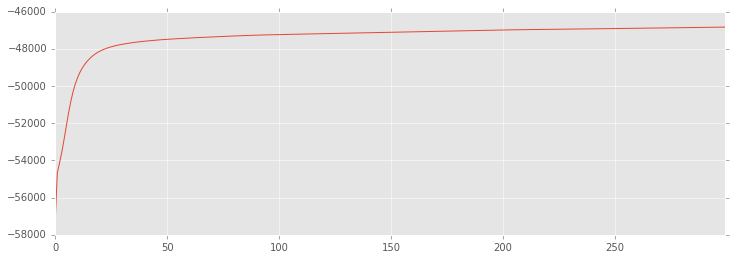

In [102]:
K = 8
gamma, phi_pq, phi_qp, B, elbos = mmsb.train_mmsb(X, V, K, n_iter=300)
pd.Series(elbos).plot(figsize=[12,4])
max(elbos), elbos[-1]

### B (interaction probabilities)

In [103]:
pd.DataFrame(B).round(3)

,0,1,2,3,4,5,6,7
0,0.500,0.225,0.732,0.360,0.444,0.538,0.478,0.565
1,0.775,0.500,0.901,0.757,0.806,0.877,0.781,0.848
2,0.268,0.099,0.500,0.147,0.203,0.276,0.231,0.301
3,0.640,0.243,0.853,0.500,0.606,0.782,0.559,0.694
4,0.556,0.194,0.797,0.394,0.500,0.687,0.477,0.614
5,0.462,0.123,0.724,0.218,0.313,0.500,0.350,0.471
6,0.522,0.219,0.769,0.441,0.523,0.650,0.500,0.612
7,0.435,0.152,0.699,0.306,0.386,0.529,0.388,0.500


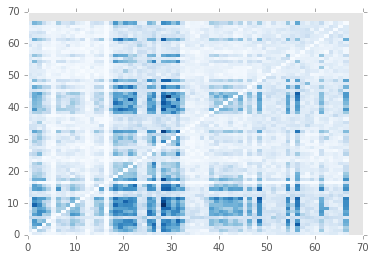

In [104]:
I = pd.DataFrame(utils.get_interactions(X, V))
gamma_df = pd.DataFrame(gamma.T)
gamma_df = gamma_df[gamma_df[0] != gamma_df[1]] # Remove items with no answers
ptypes = gamma_df.idxmax(axis=1).sort_values().index
plt.pcolor(I.ix[ptypes][ptypes], cmap='Blues')

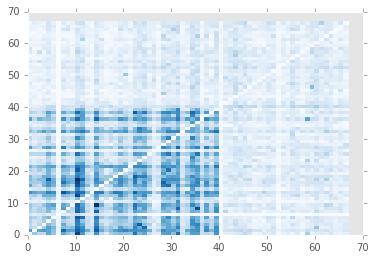

In [105]:
plt.pcolor(I.ix[gamma_df.index][gamma_df.index], cmap='Blues')

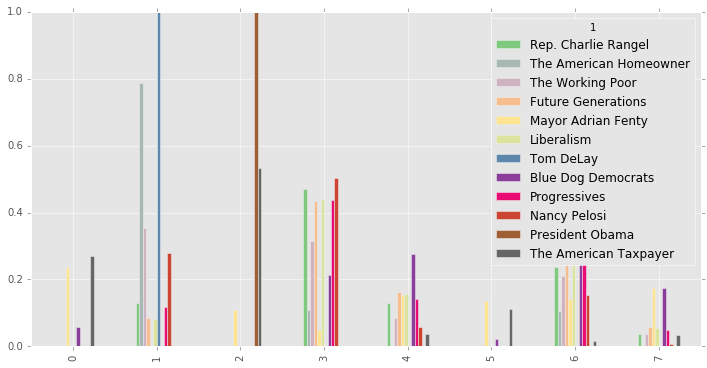

In [122]:
gamma_df = pd.DataFrame(gamma.T, index=names[:V].apply(lambda x: x[:50]))
gamma_df = gamma_df[gamma_df[0] != gamma_df[1]] # Remove items with no answers
gamma_df.iloc[:12].T.plot(kind='bar', cmap='Accent', figsize=[12,6])

In [123]:
gamma_df[0].sort_values(ascending=False).iloc[:5]

1
Organized labor             0.283774
The American Taxpayer       0.271189
the American people         0.270711
American Civil Liberties    0.254434
obama                       0.252120
Name: 0, dtype: float64

In [124]:
gamma_df[1].sort_values(ascending=False).iloc[:5]

1
D.C. schoolchildren    0.999768
Obama                  0.999504
President Obama        0.999404
Tom DeLay              0.998304
Jack Johnson           0.870149
Name: 1, dtype: float64

In [125]:
gamma_df[2].sort_values(ascending=False).iloc[:5]

1
President Obama                                       0.999789
Tome DeLay                                            0.994781
Nancy Pelosi                                          0.991085
american democracy                                    0.983655
The American people with all the socialist policie    0.719051
Name: 2, dtype: float64

In [126]:
gamma_df[3].sort_values(ascending=False).iloc[:5]

1
It would have to be Massa: Chris has way too much     0.575395
Nancy Pelosi                                          0.502915
Rep. Charlie Rangel                                   0.469152
Liberalism                                            0.439269
Progressives                                          0.438165
Name: 3, dtype: float64

In [127]:
gamma_df[4].sort_values(ascending=False).iloc[:5]

1
Blue Dog Democrats                                    0.277393
The middle class.                                     0.253614
Redskins Orioles                                      0.248306
serious why is this so lame?  this is the dumbest     0.245123
Gen. Stanley A. McChrystal                            0.212497
Name: 4, dtype: float64

In [128]:
gamma_df[5].sort_values(ascending=False).iloc[:5]

1
Obama                      0.637319
Barack Obama               0.545675
david axelrod              0.540447
Albert Haynesworth         0.458534
The Washington Redskins    0.401571
Name: 5, dtype: float64

In [129]:
gamma_df[6].sort_values(ascending=False).iloc[:5]

1
The American People                                0.338990
I quit.  This is so dumb.  This is really dumb.    0.321824
Military Retirees/Dependents                       0.321786
Albert Haynesworth                                 0.317229
Timothy Geithner and Larry Summers                 0.310593
Name: 6, dtype: float64

In [130]:
gamma_df[7].sort_values(ascending=False).iloc[:5]

1
Obama                         0.239331
Redskins Orioles              0.233877
The middle class.             0.233286
Barack Hussein Obama          0.231038
Gen. Stanley A. McChrystal    0.221953
Name: 7, dtype: float64